# DAI 6.5 Unsupervised Machine Learning: Clustering

### This script includes the following:
      1. Importing libraries and renaming columns
      2. The elbow technique
      3. K-means clustering

## 1. Importing libraries and renaming columns

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [78]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [80]:
# Set Path
path = r'/Volumes/Get to Work/Data Analytics Course 2025/Personal Project'

In [82]:
# Import Data
df = pd.read_csv('merged_home_income.csv')

In [84]:
df.shape

(48540, 5)

In [86]:
df.head()

,County,State,Year,Home Value,Income per Capita
0,Abbeville County,SC,2000,50121,23401
1,Abbeville County,SC,2001,52615,23029
2,Abbeville County,SC,2002,60726,21383
3,Abbeville County,SC,2003,64416,20250
4,Abbeville County,SC,2004,68112,21646


In [88]:
# Because the clustering method only recognizes numbers, I am going create a new data frame for Home Value and Years

Yhomevalue_df = df[['Year', 'Home Value']]


In [90]:
# And another for Income and Years

Yincome_df = [['Year', 'Income per Capita']]

## 2. The elbow technique

In [92]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [94]:
# Home Value
score = [kmeans[i].fit(Yhomevalue_df).score(Yhomevalue_df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-827268662565894.0,
 -388209394776738.44,
 -219483866404203.88,
 -135718523434898.81,
 -92794345439915.64,
 -64494206951421.74,
 -49274475865475.625,
 -37833234036753.266,
 -31411186179004.895]

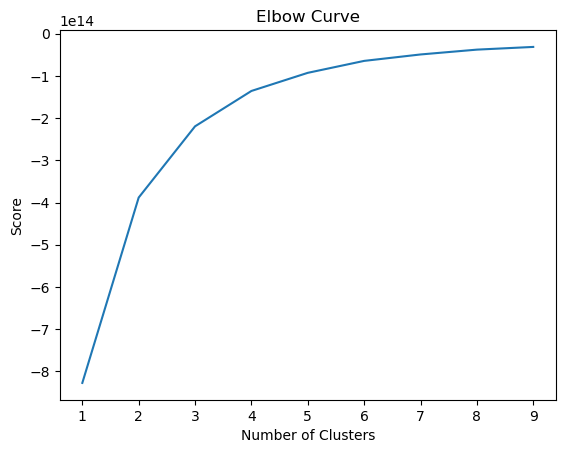

In [96]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

There is a slightly noticeable jump from cluster 3 to cluster 4, after which the curve straightens out. This means that the optimal count for this cluster is 4

## 3. K-means clustering

In [98]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [100]:
# Fit the k-means object to the data.

kmeans.fit(Yhomevalue_df)

KMeans(n_clusters=4)

In [102]:
df['clusters'] = kmeans.fit_predict(Yhomevalue_df)

In [104]:
df.head()

,County,State,Year,Home Value,Income per Capita,clusters
0,Abbeville County,SC,2000,50121,23401,1
1,Abbeville County,SC,2001,52615,23029,1
2,Abbeville County,SC,2002,60726,21383,1
3,Abbeville County,SC,2003,64416,20250,1
4,Abbeville County,SC,2004,68112,21646,1


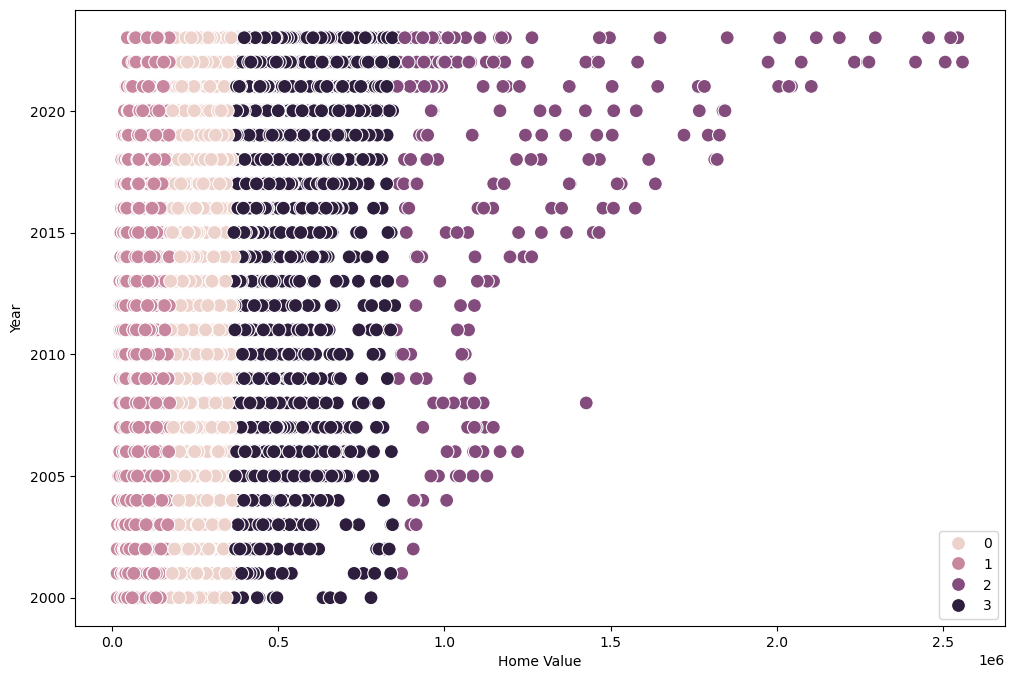

In [113]:
# Plot the clusters for the "Year" and "Home Value" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Home Value'], y=df['Year'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Home Value') # Label x-axis.
plt.ylabel('Year') # Label y-axis.
plt.show()

The scatter plot for the Home Value has an interesting shape, almost rectangular that some of the clusters overlap each other. I'm not sure if this is a normal expected shape

In [106]:
df['clusters'].value_counts()

clusters
1    32484
0    13299
3     2508
2      249
Name: count, dtype: int64

Majority of the data falls within cluster 1

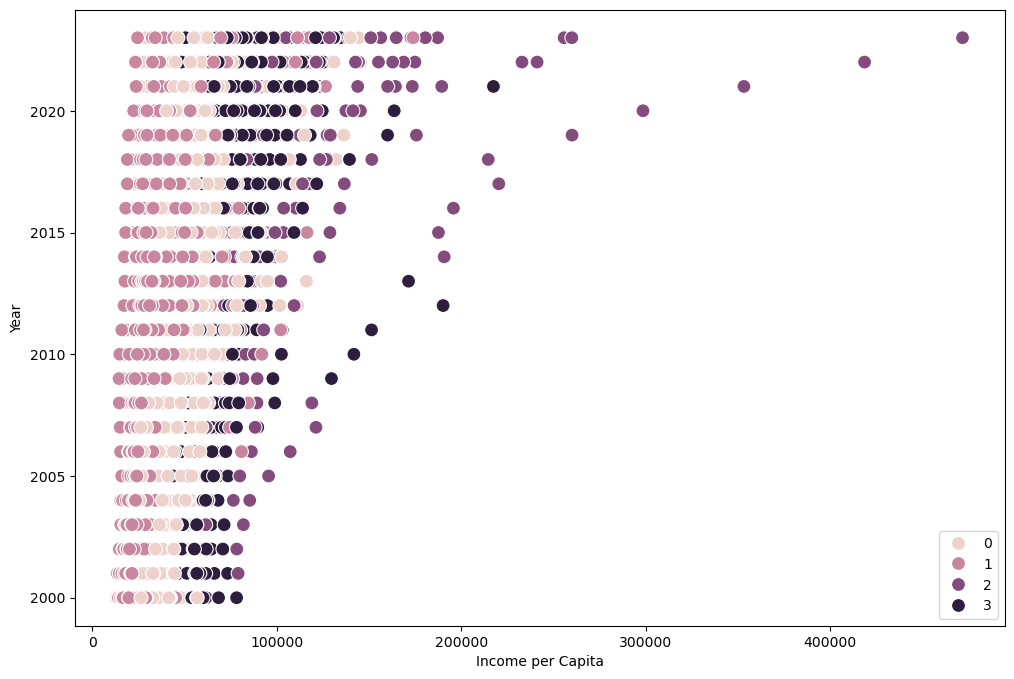

In [117]:
# Plot the clusters for the "Income" and "Year" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Income per Capita'], y=df['Year'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Income per Capita') 
plt.ylabel('Year') 
plt.show()

The clusters for the Income per Capita is less than the Home Value data, however, the shapes are similar. 

In [120]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [122]:
df.groupby('cluster').agg({'Home Value':['mean', 'median'], 
                         'Income per Capita':['mean', 'median'], 
                          'Year':['mean', 'median']})

Home Value            Income per Capita                  Year  \
                     mean     median              mean   median         mean   
cluster                                                                        
dark purple  1.207542e+06  1070004.0     101952.353414  86933.0  2016.975904   
pink         2.374429e+05   224841.0      46591.549590  45758.0  2015.271900   
purple       1.148266e+05   113868.0      34409.054488  33579.5  2011.832687   

                     
             median  
cluster              
dark purple  2019.0  
pink         2017.0  
purple       2012.0